### Exploring E-commerce Trends: A Guide to Leveraging Dummy Dataset

**Introduction:**

**In the world of e-commerce, data is a powerful asset that can be leveraged to understand customer behavior, improve sales strategies, and enhance overall business performance. This guide explores how to effectively utilize a dummy dataset generated to simulate various aspects of an e-commerce platform. By analyzing this dataset, businesses can gain valuable insights into product trends, customer preferences, and market dynamics.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ecommerce_product_dataset.csv')

df.head()


,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08


In [3]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Dropping duplicates
df = df.drop_duplicates()

# Displaying the shape of the cleaned dataset
print("Shape of the cleaned dataset:", df.shape)


Missing values in each column:
 ProductID        0
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
dtype: int64
Shape of the cleaned dataset: (1000, 10)


In [4]:
# Descriptive statistics for numerical columns
descriptive_stats = df.describe()
print("Descriptive statistics:\n", descriptive_stats)

Descriptive statistics:
          ProductID       Price       Rating   NumReviews  StockQuantity  \
count  1000.000000  1000.00000  1000.000000  1000.000000    1000.000000   
mean    500.500000   253.77551     3.025600  2498.753000     495.395000   
std     288.819436   141.40362     1.151004  1463.241871     292.799253   
min       1.000000    10.11000     1.000000     3.000000       0.000000   
25%     250.750000   133.09250     2.100000  1201.750000     241.750000   
50%     500.500000   251.31000     3.100000  2476.000000     505.000000   
75%     750.250000   375.82750     4.000000  3797.500000     743.500000   
max    1000.000000   499.74000     5.000000  4994.000000     993.000000   

          Discount        Sales  
count  1000.000000  1000.000000  
mean      0.251640  1011.037000  
std       0.146455   582.113466  
min       0.000000     0.000000  
25%       0.130000   502.000000  
50%       0.250000   998.000000  
75%       0.380000  1540.000000  
max       0.500000  1997.00

### Price Distribution

**Create a histogram to visualize the distribution of product prices.**

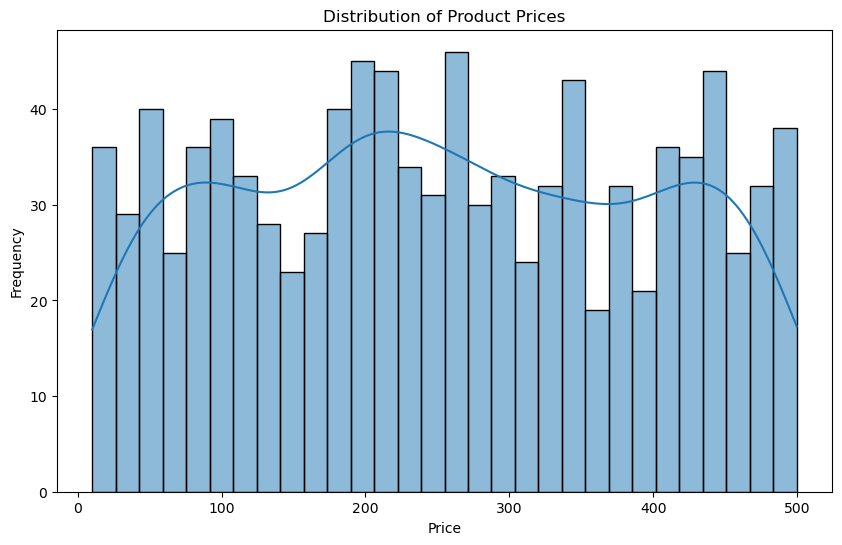

In [5]:
# Visualizing the distribution of product prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Sales by Category

**Use a bar chart to show the total sales for each product category.**

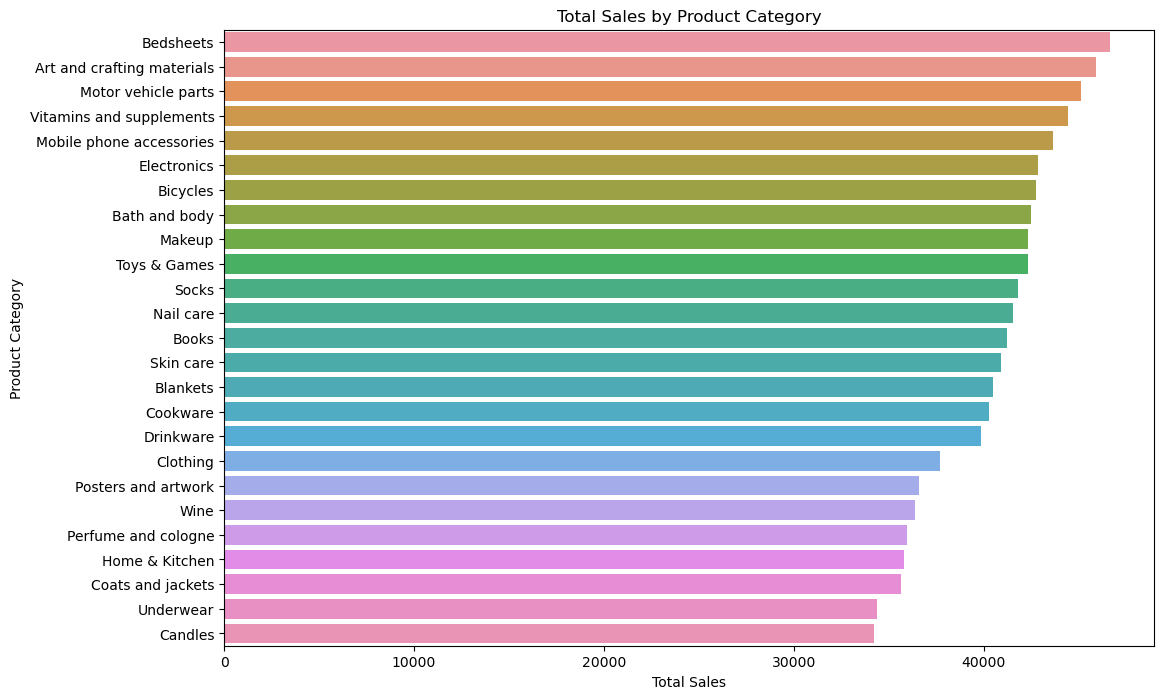

In [6]:
# Total sales by product category
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

# Visualizing total sales by product category
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Category', data=sales_by_category.sort_values(by='Sales', ascending=False))
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

### Analyzing Top-Selling Products

**Identify the top-selling products based on total sales.**

In [7]:
# Summing sales by Product_ID
top_selling_products = df.groupby('ProductID')['Sales'].sum().sort_values(ascending=False).head(10)

# Merging with the original dataframe to get product names
top_selling_products = pd.merge(top_selling_products, df[['ProductID', 'ProductName']].drop_duplicates(), on='ProductID', how='left')

# Displaying the top-selling products with their names
print("Top-selling products:\n", top_selling_products[['ProductName', 'Sales']])


Top-selling products:
         ProductName  Sales
0  Screen Protector   1997
1        Sketchbook   1995
2       Silk Sheets   1991
3           Earbuds   1984
4      Linen Sheets   1983
5        Body Scrub   1983
6         Sunscreen   1981
7           Mascara   1979
8          Fish Oil   1978
9        Headphones   1976


### Impact of Discounts on Sales

**Evaluate the effect of discounts on sales using a line plot.**

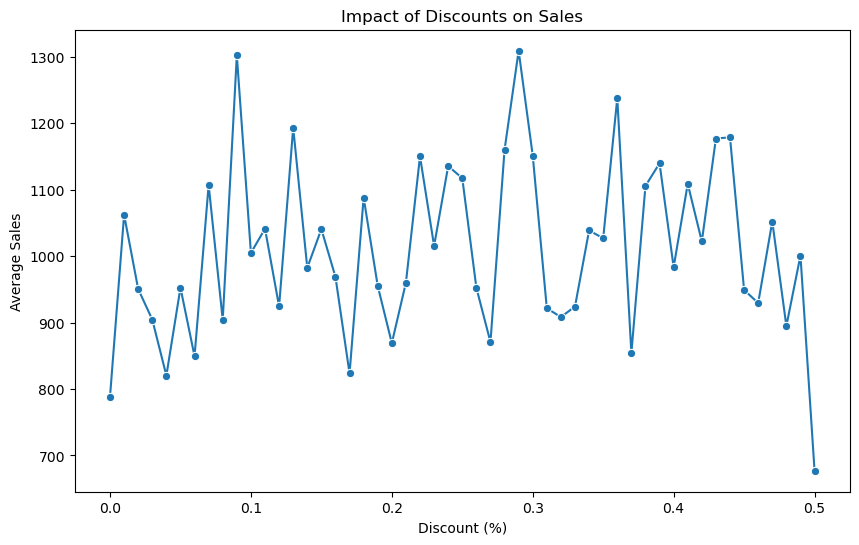

In [8]:
# Calculating the average sales at different discount levels
average_sales_by_discount = df.groupby('Discount')['Sales'].mean().reset_index()

# Visualizing the impact of discounts on sales using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Discount', y='Sales', data=average_sales_by_discount, marker='o')
plt.title('Impact of Discounts on Sales')
plt.xlabel('Discount (%)')
plt.ylabel('Average Sales')
plt.show()


### Seasonal Trends

**Examine sales data over time to identify any seasonal trends.**

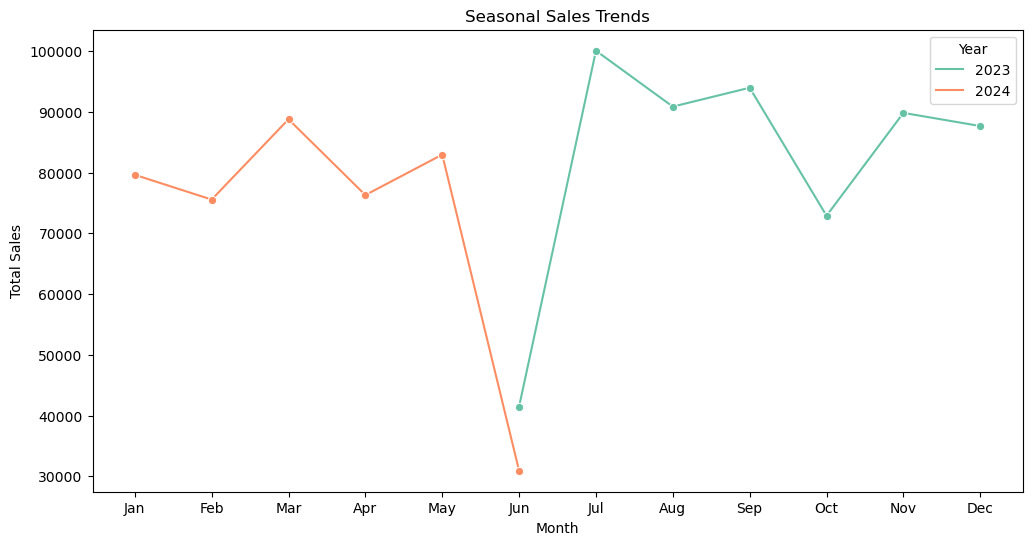

In [9]:
# Converting the Date_Added column to datetime
df['DateAdded'] = pd.to_datetime(df['DateAdded'])

# Extracting month and year from the Date_Added column
df['Month'] = df['DateAdded'].dt.month
df['Year'] = df['DateAdded'].dt.year

# Total sales by month and year
sales_by_month_year = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Visualizing sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=sales_by_month_year, marker='o', palette='Set2')
plt.title('Seasonal Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Sales Prediction using Linear Regression

**Preparing the Data**

**First, we'll prepare the data for training a Linear Regression model.**

In [10]:
# Selecting features and target variable
features = ['Price', 'Rating', 'NumReviews', 'Discount', 'StockQuantity']
target = 'Sales'

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Training the Model

**Train a Linear Regression model using the training data.**

In [11]:
# Importing the Linear Regression model
from sklearn.linear_model import LinearRegression

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)


### Evaluating the Model

**Evaluate the performance of the model using metrics such as Mean Absolute Error (MAE) and R-squared (R²).**

In [12]:
# Importing evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')


Mean Absolute Error (MAE): 514.39
R-squared (R²): -0.02


### Explanation of Linear Regression Model output

Mean Absolute Error (MAE): The Mean Absolute Error is a measure of the average magnitude of the errors between the predicted sales values and the actual sales values. In this case, the MAE value of 514.39 indicates that, on average, the model's predictions are off by approximately $514.39 from the actual sales values. A lower MAE indicates better accuracy of the model's predictions.

R-squared (R²): The R-squared value, also known as the coefficient of determination, is a measure of how well the independent variables (Price, Rating, Number_of_Reviews, Discount, Stock_Quantity) explain the variability in the dependent variable (Sales). A value of -0.02 indicates that the model does not explain the variability in the sales data well.
An R-squared value closer to 1 indicates that the model explains a large proportion of the variance in the sales data, suggesting a good fit.
An R-squared value of 0 indicates that the model does not explain the variance in the sales data at all, essentially performing no better than a model that predicts the mean of the sales values.
An R-squared value less than 0 can occur when the model performs even worse than predicting the mean, which might indicate that the model is not appropriate for the data or there are issues with the data.

In summary, a high MAE value and a negative R-squared value suggest that the Linear Regression model may not be the best fit for the sales prediction task using the given features. Further analysis and possibly different modeling approaches may be needed to improve the accuracy of the sales predictions.

### Clustering for Customer Segmentation

**Applied K-means clustering to identify distinct customer segments based on product features.**

In [13]:
# Selecting features for clustering
customer_features = ['Price', 'Rating', 'NumReviews', 'Discount', 'Sales']

# Standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(df[customer_features])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


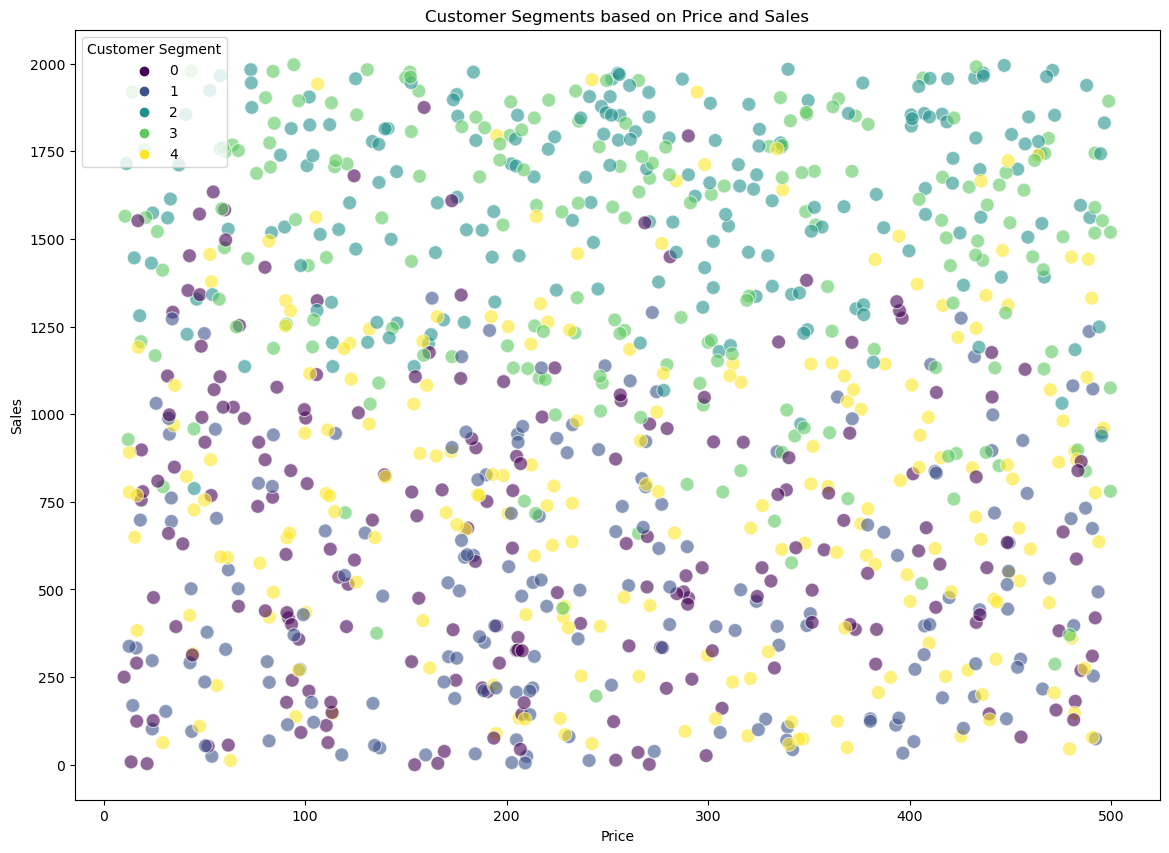

In [14]:
# Importing K-Means
from sklearn.cluster import KMeans

# Creating and fitting the model
kmeans = KMeans(n_clusters=5, random_state=42)
df['Customer_Segment'] = kmeans.fit_predict(customer_features_scaled)

# Visualizing the clusters
plt.figure(figsize=(14, 10))
sns.scatterplot(x=df['Price'], y=df['Sales'], hue=df['Customer_Segment'], palette='viridis', s=100, alpha=0.6)
plt.title('Customer Segments based on Price and Sales')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.legend(title='Customer Segment')
plt.show()
